# Train a DNN on MNIST

In [1]:
from time import strftime

# Keras
import keras as K
from keras.models import Sequential
from keras.layers import Dense, Reshape, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import TensorBoard

# Numpy
import numpy as np

# Pandas for reading csv
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0)

Using TensorFlow backend.


## Load the data

In [2]:
def class_2_one_hot(lab):
    lab_int = lab.astype(int)
    one_hot = np.zeros((len(lab_int), max(lab_int)+1))
    one_hot[np.arange(len(lab_int)),lab_int] = 1
    return one_hot

def one_hot_2_class(one_hot):
    return np.argmax(one_hot, axis=1)

In [3]:
known_file = '../data/train.csv'
test_file = '../data/test.csv'
val_split = 0.95

known_data = pd.read_csv(known_file, delimiter=',').values

train_n = int(len(known_data) * val_split)
train_img = known_data[0:train_n,1:] / 255
train_lab = class_2_one_hot(known_data[0:train_n,0])
val_img = known_data[train_n:,1:] / 255
val_lab = class_2_one_hot(known_data[train_n:,0])

input_size = (784,)
img_size = (28,28,1)

print("Training examples: ", len(train_img))
print("Validataion examples: ", len(val_img))

Training examples:  39900
Validataion examples:  2100


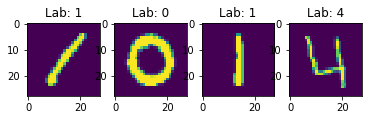

In [4]:
def plot_first(imgs, labels, count = 4):
    fig = plt.figure()

    for i in range(count):
        ax = plt.subplot(1, count, i+1)
        ax.set_title("Lab: %s" % int(labels[i]))
        ax.imshow(np.reshape(imgs[i], (28,28)))

    plt.show()
    
plot_first(train_img, one_hot_2_class(train_lab))

# Construct the model

In [11]:
model = Sequential()
model.add(Reshape(img_size, input_shape=input_size))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
__________

### Add tensorboard callback

In [12]:
tensorboard_callback = TensorBoard(log_dir='../logs/{}'.format(strftime('%Y-%m-%d_%H%M%S')),
                                   write_graph=False,
                                   write_images=True)

Run Tensorboard with `tensorboard --logdir=logs` from the project root.

# Train the model

In [13]:
batch_size = 128
epochs = 20

model.fit(x=train_img,
          y=train_lab,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(val_img, val_lab),
          callbacks=[tensorboard_callback])

Train on 39900 samples, validate on 2100 samples
Epoch 1/20
39900/39900 [==============================] - 4s 93us/step - loss: 0.2024 - acc: 0.9368 - val_loss: 0.0862 - val_acc: 0.9690
Epoch 2/20
39900/39900 [==============================] - 4s 92us/step - loss: 0.0492 - acc: 0.9838 - val_loss: 0.0442 - val_acc: 0.9867
Epoch 3/20
39900/39900 [==============================] - 4s 92us/step - loss: 0.0325 - acc: 0.9897 - val_loss: 0.0347 - val_acc: 0.9910
Epoch 4/20
39900/39900 [==============================] - 4s 91us/step - loss: 0.0239 - acc: 0.9923 - val_loss: 0.0436 - val_acc: 0.9867
Epoch 5/20
39900/39900 [==============================] - 4s 90us/step - loss: 0.0198 - acc: 0.9937 - val_loss: 0.0426 - val_acc: 0.9905
Epoch 6/20
39900/39900 [==============================] - 4s 90us/step - loss: 0.0144 - acc: 0.9955 - val_loss: 0.0318 - val_acc: 0.9924
Epoch 7/20
39900/39900 [==============================] - 4s 90us/step - loss: 0.0116 - acc: 0.9963 - val_loss: 0.0289 - val_acc:

Accuracy:  99.14285714285714 %


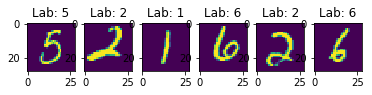

In [14]:
p = one_hot_2_class(model.predict(val_img))
accuracy = sum(p == one_hot_2_class(val_lab)) / len(val_lab)
print('Accuracy: ', accuracy*100, '%')
plot_first(val_img, p, 6)